# Perceptron Training

The objective of this notebook is train a perceptron against an arbitrary linearly classifiable dataset til convergence.

### Block used for importing local ml package

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Constraint variables

In [2]:
train_size = 20
test_size = 10000
x_start = y_start = -100
x_end = y_end = 100
margin = 5

### Generate training and testing datasets

In [3]:
import numpy as np
from ml import datagen

train_set, train_labels = map(
    np.array,
    datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
)

test_set, test_labels = map(
    np.array,
    datagen.make_uniform(test_size, x_start, x_end, y_start, y_end, margin)
)

### Plot perceptron

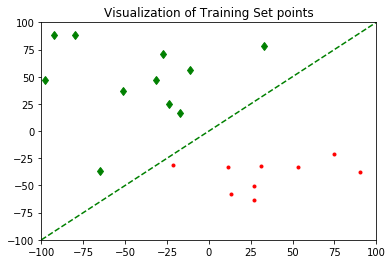

In [6]:
import matplotlib.pyplot as plt
from ml.perceptron import Perceptron

dimensions = 2
learning_rate = 0.2

p = Perceptron(dimensions, learning_rate)

plt.title('Visualization of Training Set points')
plt.axis([x_start, x_end, y_start, y_end])
plt.plot([x_start, x_end], [y_start, y_end], 'g--')
for coordinate, label in zip(train_set, train_labels):
    guess = p.classify(coordinate)
    appearance = ''
    appearance += 'g' if guess == label else 'r'
    appearance += 'd' if label == 1 else '.'
    plt.plot(*coordinate, appearance)
plt.show()

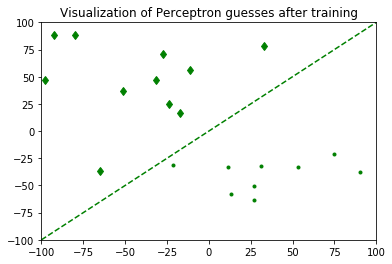

In [8]:
# Train the perceptron and plot again.

p.train(train_set, train_labels)

plt.title('Visualization of Perceptron guesses after training')
plt.axis([x_start, x_end, y_start, y_end])
plt.plot([x_start, x_end], [y_start, y_end], 'g--')
for coordinate, label in zip(train_set, train_labels):
    guess = p.classify(coordinate)
    appearance = ''
    appearance += 'g' if guess == label else 'r'
    appearance += 'd' if label == 1 else '.'
    plt.plot(*coordinate, appearance)
plt.show()